In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img,img_to_array
from keras import layers
from keras import models
from keras import callbacks
from keras.optimizers import Adam
from keras.models import load_model
import os
import cv2 as cv
from tensorflow.keras.utils import to_categorical

In [11]:
train="data\\train"
validation="data\\validation"
test="data\\test"

In [12]:
train_data_generator = ImageDataGenerator(rescale=1.0/255)

In [13]:
test_data = train_data_generator.flow_from_directory(
    directory=test,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True 
)

train_data = train_data_generator.flow_from_directory(
    directory=train,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True 
)

validation_data = train_data_generator.flow_from_directory(
    directory=validation,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True 
)



Found 13505 images belonging to 9 classes.
Found 58535 images belonging to 9 classes.
Found 18012 images belonging to 9 classes.


In [14]:
def create_model():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3),name='Input Layer'),
        
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        layers.BatchNormalization(),
        
        layers.SpatialDropout2D(rate=0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        
        layers.Flatten(),        
        
        layers.Dense(4608, activation='relu'),
        
        layers.Dense(512, activation='relu'),
        
        layers.Dense(9, activation='softmax') ,
        
    ])
    
    
    return model

In [16]:
model=create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_8 (Bat  (None, 222, 222, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 16)      2320      
                                                                 
 batch_normalization_9 (Bat  (None, 220, 220, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 32)      4640      
                                                                 
 batch_normalization_10 (Ba  (None, 218, 218, 32)     

In [17]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:

checkpoint = callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


In [19]:
history = model.fit(
    train_data, 
    batch_size=64,
    validation_data=validation_data,
    epochs=20,
    verbose=True,
    callbacks=[checkpoint]
)

Epoch 1/20


915/915 [==============================] - ETA: 0s - loss: 1.2308 - accuracy: 0.6990
Epoch 1: val_accuracy improved from -inf to 0.75178, saving model to best_model.keras
915/915 [==============================] - 2910s 3s/step - loss: 1.2308 - accuracy: 0.6990 - val_loss: 0.6326 - val_accuracy: 0.7518
Epoch 2/20
915/915 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.7997
Epoch 2: val_accuracy improved from 0.75178 to 0.84555, saving model to best_model.keras
915/915 [==============================] - 2594s 3s/step - loss: 0.5353 - accuracy: 0.7997 - val_loss: 0.4286 - val_accuracy: 0.8455
Epoch 3/20
915/915 [==============================] - ETA: 0s - loss: 0.4281 - accuracy: 0.8457
Epoch 3: val_accuracy improved from 0.84555 to 0.87558, saving model to best_model.keras
915/915 [==============================] - 2573s 3s/step - loss: 0.4281 - accuracy: 0.8457 - val_loss: 0.3550 - val_accuracy: 0.8756
Epoch 4/20
915/915 [===========================

In [20]:
prdictions=model.predict(test_data)

212/212 [==============================] - 253s 1s/step


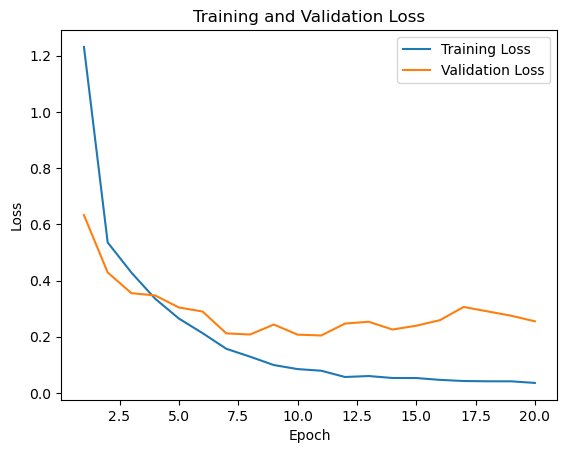

In [21]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss over epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
preds=np.argmax(prdictions,axis=1)

In [27]:
act=test_data.classes


In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
print(classification_report(act,preds))

              precision    recall  f1-score   support

           0       0.11      0.11      0.11      1498
           1       0.11      0.11      0.11      1500
           2       0.10      0.10      0.10      1501
           3       0.11      0.11      0.11      1501
           4       0.11      0.11      0.11      1501
           5       0.11      0.11      0.11      1501
           6       0.10      0.10      0.10      1501
           7       0.11      0.10      0.11      1501
           8       0.11      0.12      0.12      1501

    accuracy                           0.11     13505
   macro avg       0.11      0.11      0.11     13505
weighted avg       0.11      0.11      0.11     13505



In [32]:
confusion_matrix(act,preds)

array([[165, 192, 162, 153, 172, 171, 156, 153, 174],
       [175, 166, 172, 161, 170, 147, 180, 155, 174],
       [172, 146, 157, 170, 187, 160, 175, 154, 180],
       [175, 181, 185, 168, 147, 156, 180, 145, 164],
       [157, 160, 181, 143, 159, 181, 181, 156, 183],
       [160, 175, 166, 171, 182, 161, 151, 160, 175],
       [175, 148, 151, 177, 158, 182, 149, 175, 186],
       [171, 178, 177, 153, 157, 165, 157, 157, 186],
       [145, 167, 147, 194, 168, 171, 169, 160, 180]], dtype=int64)

In [34]:
accuracy_score(act,preds)

0.10825620140688634

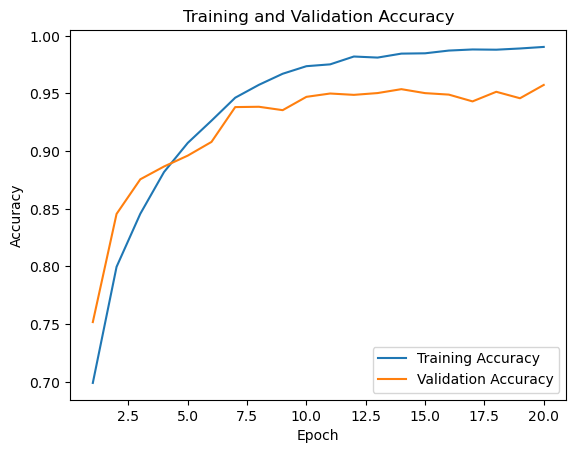

In [35]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing the training history
train_accuracy = history.history['accuracy']  # Replace 'accuracy' with your actual metric name
val_accuracy = history.history['val_accuracy']  # Replace 'val_accuracy' with your actual metric name

# Plotting training and validation accuracy over epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()